In [1]:
%pylab inline
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pmdarima as pm
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('ETH_1min.csv', index_col=['Date'], parse_dates=['Date'])

In [3]:
df

,Unix Timestamp,Symbol,Open,High,Low,Close,Volume
Date,,,,,,,
2020-04-16 00:00:00,1586995200000,ETHUSD,152.94,152.94,151.33,151.33,112.724931
2020-04-15 23:59:00,1586995140000,ETHUSD,152.94,152.94,152.94,152.94,0.000000
2020-04-15 23:58:00,1586995080000,ETHUSD,153.17,153.17,152.94,152.94,0.013011
2020-04-15 23:57:00,1586995020000,ETHUSD,152.96,153.20,152.96,153.17,466.782278
2020-04-15 23:56:00,1586994960000,ETHUSD,153.14,153.14,152.96,152.96,167.930714
...,...,...,...,...,...,...,...
2016-05-09 13:36:00,1462800960,ETHUSD,10.00,10.00,10.00,10.00,0.375000
2016-05-09 13:35:00,1462800900,ETHUSD,10.00,10.00,10.00,10.00,60.000000
2016-05-09 13:34:00,1462800840,ETHUSD,10.00,10.00,10.00,10.00,8.000000


In [4]:
df.drop("Unix Timestamp", inplace=True, axis=1)
df.drop("Symbol", inplace=True, axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1984012 entries, 2020-04-16 00:00:00 to 2016-05-09 13:32:00
Data columns (total 5 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Open    float64
 1   High    float64
 2   Low     float64
 3   Close   float64
 4   Volume  float64
dtypes: float64(5)
memory usage: 90.8 MB


In [6]:
df_week = df[1440*3::-1]

In [7]:
df_week

,Open,High,Low,Close,Volume
Date,,,,,
2020-04-13 00:00:00,158.56,158.82,158.00,158.00,57.553686
2020-04-13 00:01:00,158.00,158.50,158.00,158.50,188.783790
2020-04-13 00:02:00,158.50,158.50,157.50,157.86,123.303208
2020-04-13 00:03:00,157.86,157.86,157.32,157.32,20.328900
2020-04-13 00:04:00,157.32,157.38,157.20,157.38,4.794839
...,...,...,...,...,...
2020-04-15 23:56:00,153.14,153.14,152.96,152.96,167.930714
2020-04-15 23:57:00,152.96,153.20,152.96,153.17,466.782278
2020-04-15 23:58:00,153.17,153.17,152.94,152.94,0.013011


In [8]:
y_test = df_week.Close[-1440::]
df_week_train = df_week[:-1440:]

In [9]:
y_test

Date
2020-04-15 00:01:00    157.28
2020-04-15 00:02:00    157.00
2020-04-15 00:03:00    157.11
2020-04-15 00:04:00    157.11
2020-04-15 00:05:00    157.11
                        ...  
2020-04-15 23:56:00    152.96
2020-04-15 23:57:00    153.17
2020-04-15 23:58:00    152.94
2020-04-15 23:59:00    152.94
2020-04-16 00:00:00    151.33
Name: Close, Length: 1440, dtype: float64

In [10]:
df_week_train

,Open,High,Low,Close,Volume
Date,,,,,
2020-04-13 00:00:00,158.56,158.82,158.00,158.00,57.553686
2020-04-13 00:01:00,158.00,158.50,158.00,158.50,188.783790
2020-04-13 00:02:00,158.50,158.50,157.50,157.86,123.303208
2020-04-13 00:03:00,157.86,157.86,157.32,157.32,20.328900
2020-04-13 00:04:00,157.32,157.38,157.20,157.38,4.794839
...,...,...,...,...,...
2020-04-14 23:56:00,158.05,158.30,158.05,158.30,0.716060
2020-04-14 23:57:00,158.30,158.34,158.30,158.34,0.685700
2020-04-14 23:58:00,158.34,158.50,158.34,158.50,0.630974


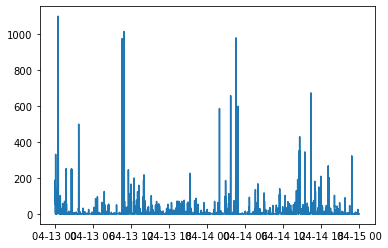

In [11]:
plt.plot(df_week_train.Volume)

Text(0.5, 0, 'Date & Time')

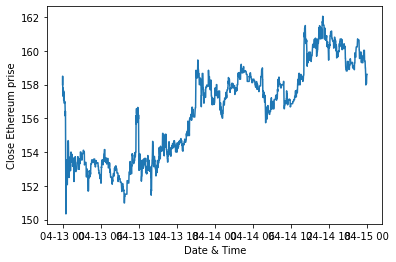

In [12]:
plt.plot(df_week_train['Close'])
plt.ylabel('Close Ethereum prise')
plt.xlabel('Date & Time')

In [13]:
print("Dickey — Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_week_train.Close)[1])

Dickey — Fuller test: p=0.446712


In [14]:
df_week_train['Close_diff'] = df_week_train.Close - df_week_train.Close.shift(1)

<ipython-input-14-ab5da41f8711>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_week_train['Close_diff'] = df_week_train.Close - df_week_train.Close.shift(1)


<Figure size 1080x720 with 0 Axes>

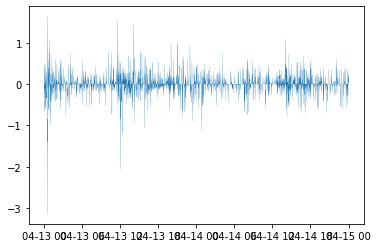

<Figure size 1080x720 with 0 Axes>

In [15]:
plt.plot(df_week_train.Close_diff, linewidth=0.2)
plt.figure(figsize(15,10))

In [16]:
print("Dickey — Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_week_train.Close_diff[1:])[1])

Dickey — Fuller test: p=0.000000


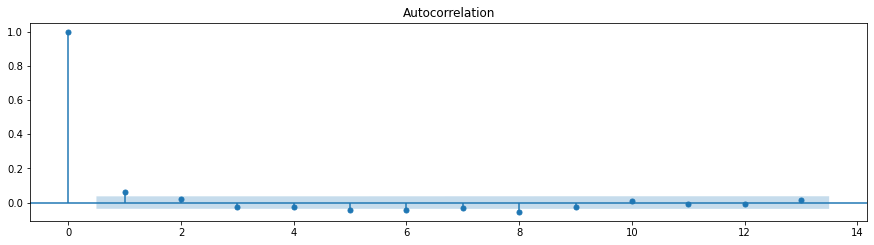

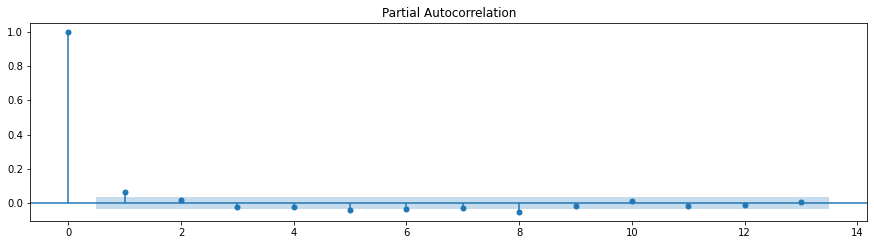

In [17]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_week_train.Close_diff[5:].values.squeeze(), lags=13, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_week_train.Close_diff[5:].values.squeeze(), lags=13, ax=ax)
pylab.show()

In [18]:
ARIMA = pm.auto_arima(df_week_train.Close,
                     seasonal = True,
                     m = 5,
                     d = 1,
                     D = 0,
                     start_p = 1,
                     start_q = 1,
                     max_p = 5,
                     max_q = 5,
                     start_P = 1,
                     start_Q = 1,
                     max_P = 5,
                     max_Q = 5,
                     trace = True,
                     error_action='ignore',
                      suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[5] intercept   : AIC=-1007.931, Time=1.56 sec
 ARIMA(0,1,0)(0,0,0)[5] intercept   : AIC=-1000.323, Time=0.24 sec
 ARIMA(1,1,0)(1,0,0)[5] intercept   : AIC=-1011.729, Time=0.50 sec
 ARIMA(0,1,1)(0,0,1)[5] intercept   : AIC=-1011.402, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[5]             : AIC=-1002.320, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[5] intercept   : AIC=-1009.174, Time=0.23 sec
 ARIMA(1,1,0)(2,0,0)[5] intercept   : AIC=-1009.778, Time=1.00 sec
 ARIMA(1,1,0)(1,0,1)[5] intercept   : AIC=-1009.754, Time=2.02 sec
 ARIMA(1,1,0)(0,0,1)[5] intercept   : AIC=-1011.679, Time=1.12 sec
 ARIMA(1,1,0)(2,0,1)[5] intercept   : AIC=-1007.747, Time=0.85 sec
 ARIMA(0,1,0)(1,0,0)[5] intercept   : AIC=-1003.803, Time=0.19 sec
 ARIMA(2,1,0)(1,0,0)[5] intercept   : AIC=-1010.090, Time=0.67 sec
 ARIMA(1,1,1)(1,0,0)[5] intercept   : AIC=-1009.906, Time=1.68 sec
 ARIMA(0,1,1)(1,0,0)[5] intercept   : AIC=-1011.451, Time=0.42 sec
 ARIMA(2,1,1)(1,0,0

In [19]:
ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 2881
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 5)   Log Likelihood                 509.863
Date:                           Wed, 09 Jun 2021   AIC                          -1013.726
Time:                                   06:47:43   BIC                           -995.829
Sample:                                        0   HQIC                         -1007.275
                                          - 2881                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0588      0.013      4.513      0.000       0.033       0.084
ar.S.L5       -0.0401      0.011     -3.617      0.000      -0.062      -0.018
sigma2         0.0411      0.000    129.705      0.000       0.040       0.042
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            115097.04
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.45   Skew:                            -1.36
Prob(H) (two-sided):                  0.00   Kurtosis:                        33.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

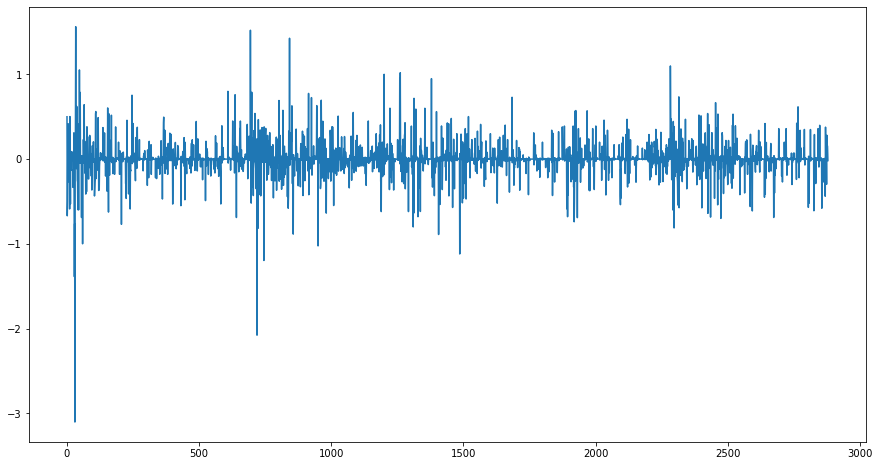

In [20]:
plt.plot(ARIMA.resid()[1:])

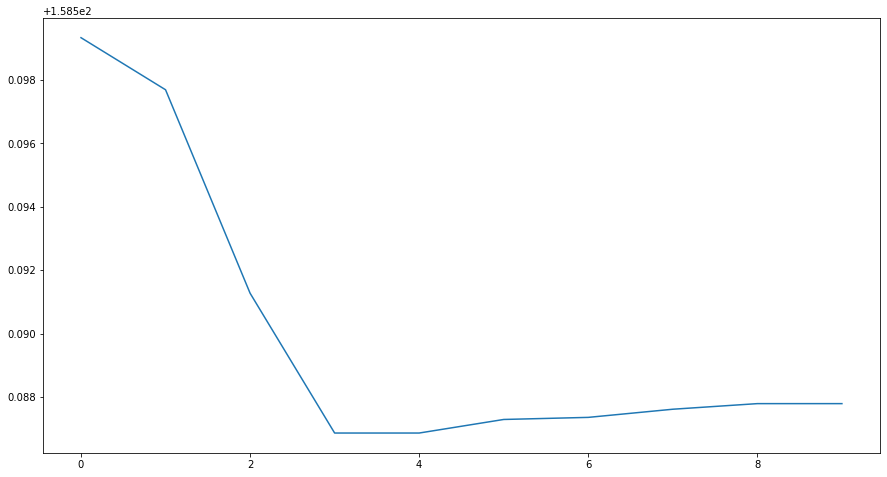

In [21]:
plt.plot(ARIMA.predict(10))

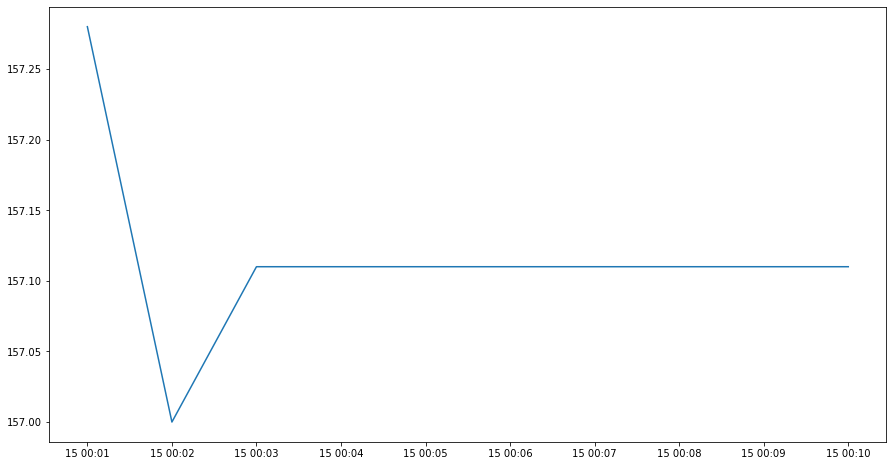

In [22]:
plt.plot(y_test[:10])

In [35]:
from numpy import array
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [36]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [37]:
raw_seq = df_week_train.Close
n_steps = 10

In [40]:
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [41]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [44]:
model.fit(X, y, epochs=100, verbose=0)